# Linear Regression

In [127]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
from pathlib import Path
mpl.rcParams['figure.figsize'] = (14,10)

Attribute Information:

1. CRIM   --   per capita crime rate by town
2. ZN     --   proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS  --   proportion of non-retail business acres per town
4. CHAS   --   Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX    --   nitric oxides concentration (parts per 10 million)
6. RM     --   average number of rooms per dwelling
7. AGE    --   proportion of owner-occupied units built prior to 1940
8. DIS    --   weighted distances to five Boston employment centres
9. RAD    --   index of accessibility to radial highways
10. TAX   --   full-value property-tax rate per 10,000 dollars
11. PTRATIO -- pupil-teacher ratio by town
12. B     --   1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT --   % lower status of the population
14. MEDV  --   Median value of owner-occupied homes in 1000 dollars

In [128]:
data_path = Path.cwd().parent / 'data'/ 'housing.data'
dt = pd.read_csv(data_path, header=None, sep=r'\s+')
dt.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


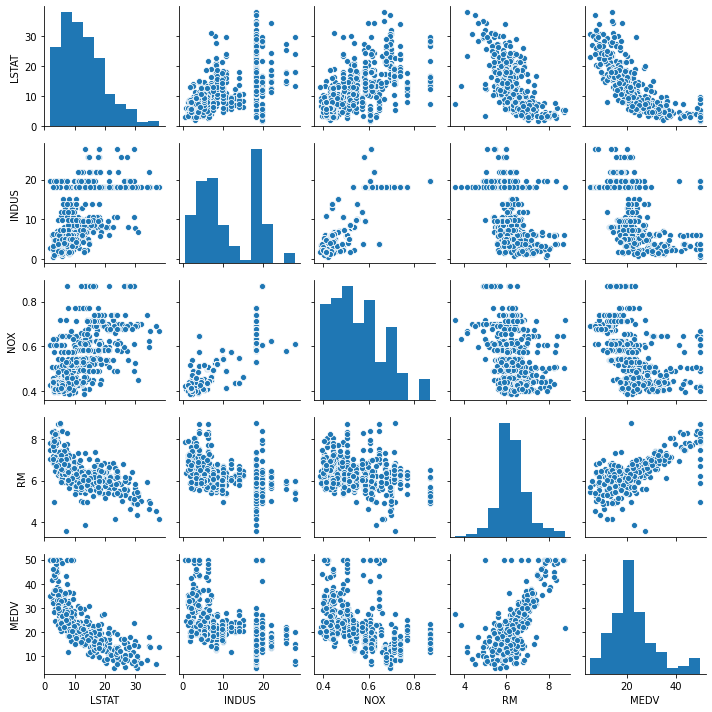

In [16]:
cols = ['LSTAT','INDUS','NOX','RM','MEDV']
sns.pairplot(dt[cols], height = 2.0)
plt.tight_layout()

### Вычислим коэфициенты корреляции

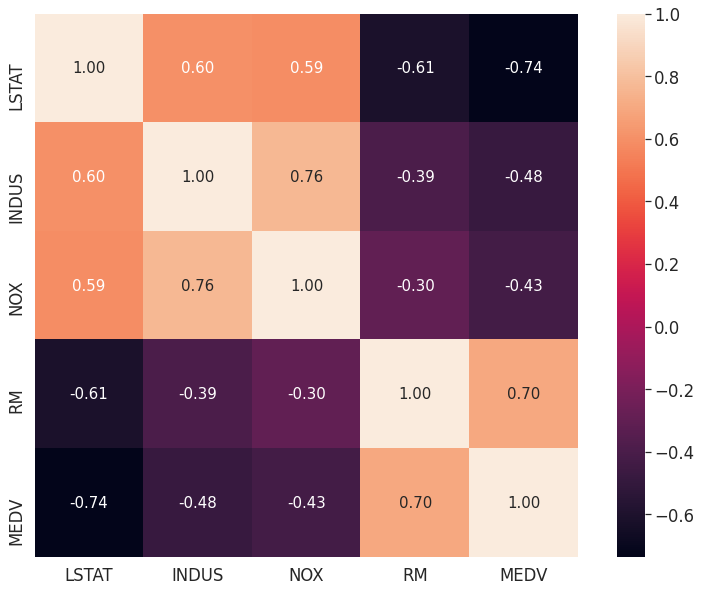

In [129]:
corr = np.corrcoef(dt[cols].values.T)
sns.set(font_scale=1.5)
sns.heatmap(corr, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':15},
           yticklabels=cols, xticklabels=cols)

In [130]:
from sklearn.linear_model import LinearRegression

In [131]:
X = dt['RM'].values.reshape(-1,1) # должен быть столбец!

In [132]:
y = dt['MEDV'].values # Целевая переменная

In [133]:
slr = LinearRegression().fit(X,y)

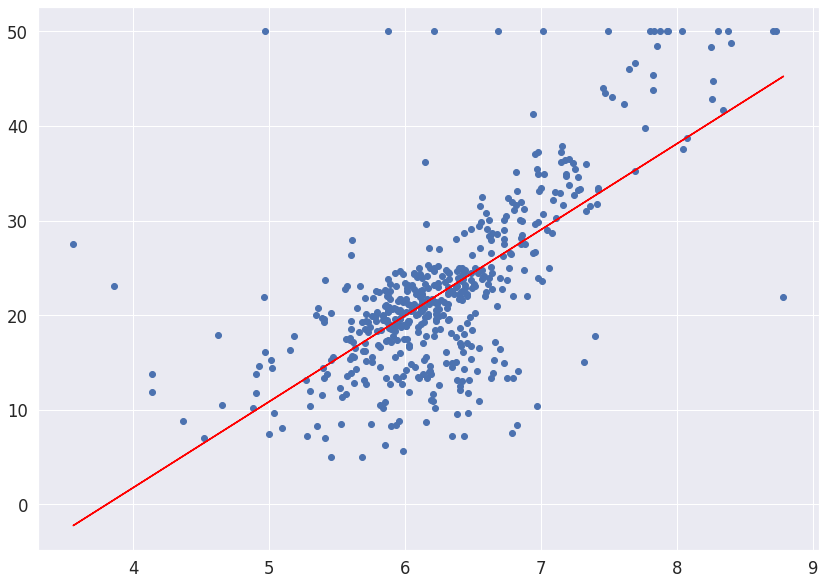

In [134]:
plt.scatter(X[:,0], y, marker='o')
plt.plot(X[:,0], slr.predict(X), color='red')

In [135]:
X1 = dt['LSTAT'].values.reshape(-1,1) # должен быть столбец!
X2 = dt['NOX'].values.reshape(-1,1) # должен быть столбец!

In [136]:
y = dt['MEDV'].values # Целевая переменная

In [137]:
slr1 = LinearRegression().fit(X1,y)
slr2 = LinearRegression().fit(X2,y)

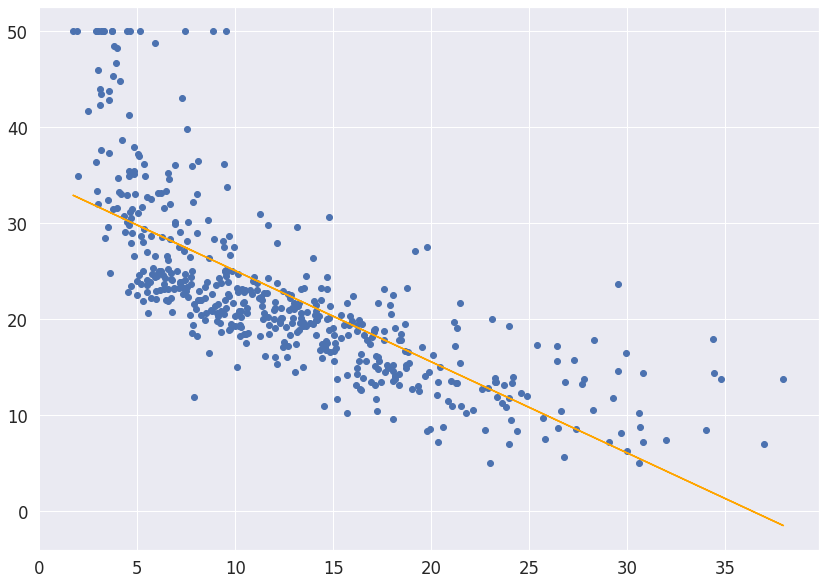

In [138]:
plt.scatter(X1[:,0], y, marker='o')
plt.plot(X1[:,0], slr1.predict(X1), color='orange')

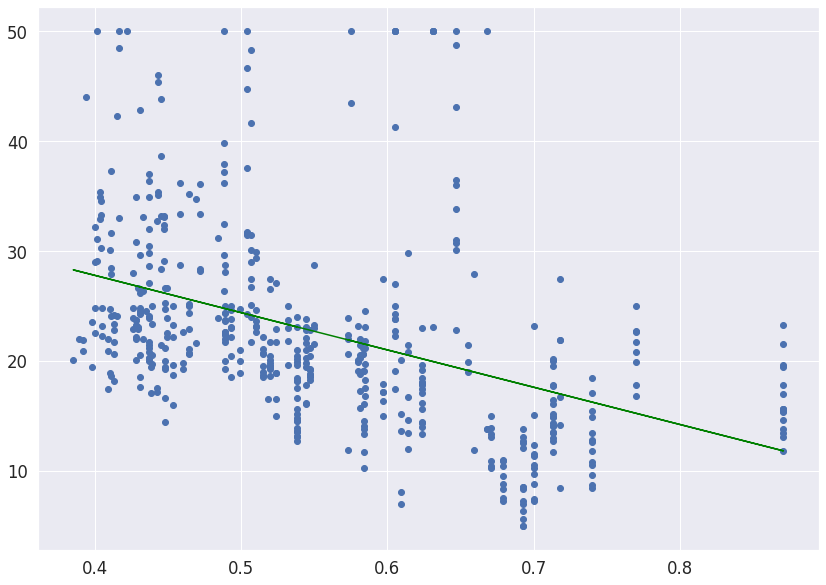

In [47]:
plt.scatter(X2[:,0], y, marker='o')
plt.plot(X2[:,0], slr2.predict(X2), color='green')

# Построим модель по всем факторам

In [139]:
X = dt.iloc[:,:-1].values
y = dt['MEDV'].values

### Разобьем на тестовое и обучающее множества

In [140]:
from sklearn.model_selection import train_test_split
# Множества не перемешивать!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

### Обучим

In [141]:
slr = LinearRegression().fit(X_train, y_train) 

### Прогноз по обучающему и тестовому множествам

In [142]:
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

In [143]:
from sklearn.metrics import mean_squared_error, r2_score

In [144]:
mean_squared_error(y_train, y_train_pred) # значение СКО прогнозного значения от разметки

19.958219814238046

In [145]:
mean_squared_error(y_test, y_test_pred)

27.195965766883432

### Критерий качества $R^2$

* $\mu_y$ -- математическое ожидание $y$ без учета прогнозных признаком
* $SSE$ -- среднеквадратичное отклонение прогнозного значения от разметки
* $SST$ -- среднеквадратичное отклонение прогнозного значения от среднего

$$R^2 = 1 - \frac{SSE}{SST}$$

* $R^2 = 1$ -- построенная модель идеально подходит для прогноза
* $R^2 > 0$ -- построенная модель подходит для прогноза
* $R^2 < 0$ -- построенная модель непригодна, лучше принять за прогноз просто среднее значение

In [150]:
RkvAll_tr = round(r2_score(y_train, y_train_pred),2)

In [151]:
RkvAll_te = round(r2_score(y_train, y_train_pred),2)

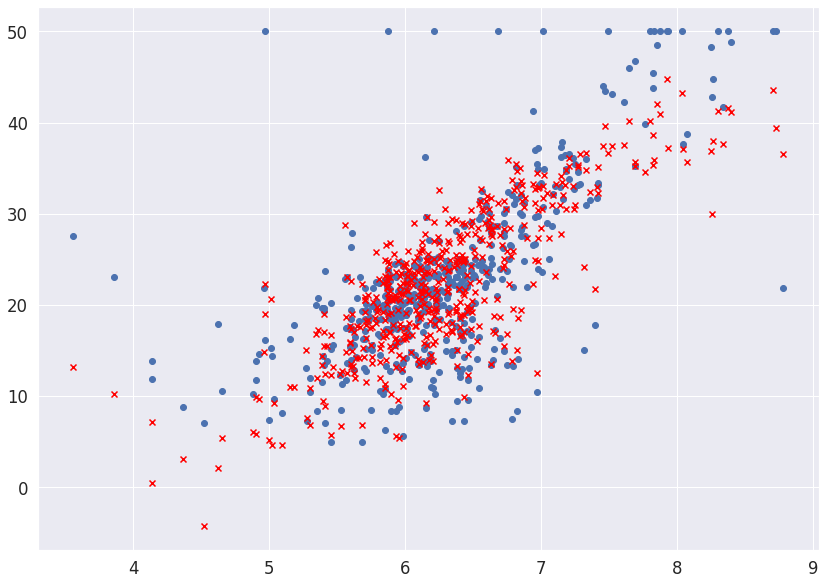

In [67]:
plt.scatter(dt['RM'], dt['MEDV'], marker='o')
plt.scatter(dt['RM'], slr.predict(X), marker='x',color='red')

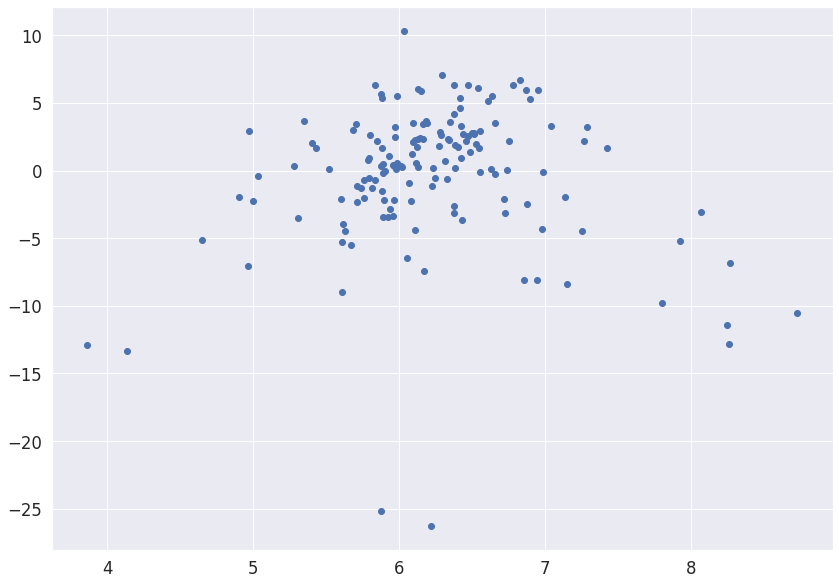

In [68]:
delta = slr.predict(X_test)- y_test # отклонение прогноза от разметки
plt.scatter(X_test[:,5], delta)

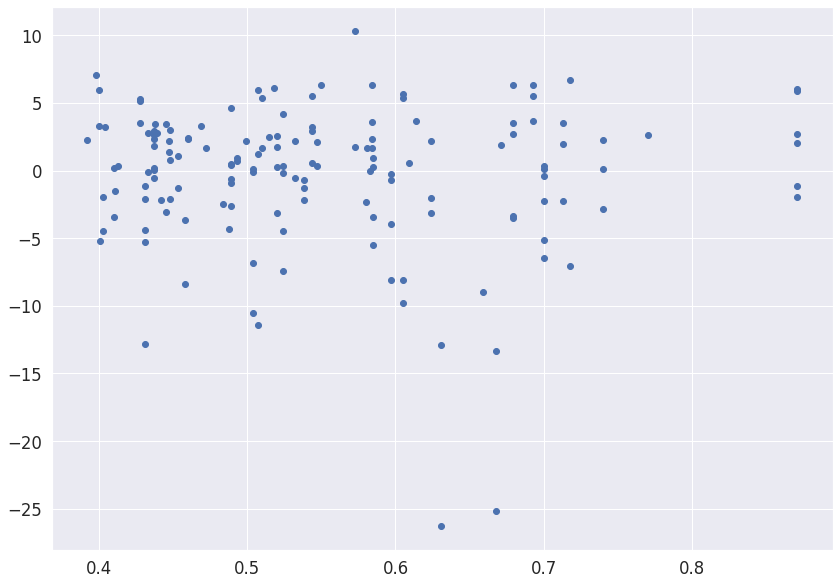

In [69]:
delta = slr.predict(X_test)- y_test # отклонение прогноза от разметки
plt.scatter(X_test[:,4], delta)

# Задача:

1. Оценить качество однофакторных прогнозных моделей линейной регрессии, построенных по признакам LSTAT, RM и NOX по критерию $R^2$.
2. Оценить качество двухфакторной прогнозной модели, построенной по признакам LSTAT и RM.
3. Оценить качество трехфакторной прогнозной модели, построенной по признакам LSTAT, RM и NOX.
4. Сравнить модели по критерию $R^2$ между собой и смоделью, построенной по всем признакам.

### Решение

In [112]:
X1 = dt['LSTAT'].values.reshape(-1,1)
X2 = dt['RM'].values.reshape(-1,1)
X3 = dt['NOX'].values.reshape(-1,1)
X4 = dt[['LSTAT','RM']].values
X5 = dt[['LSTAT','RM','NOX']].values

y = dt['MEDV'].values

In [113]:
# Разбиваем множества
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size=0.3, random_state = 0)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.3, random_state = 0)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y, test_size=0.3, random_state = 0)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y, test_size=0.3, random_state = 0)
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y, test_size=0.3, random_state = 0)

In [114]:
# Обучаем
slr1 = LinearRegression().fit(X_train1, y_train1) 
slr2 = LinearRegression().fit(X_train2, y_train2) 
slr3 = LinearRegression().fit(X_train3, y_train3) 
slr4 = LinearRegression().fit(X_train4, y_train4) 
slr5 = LinearRegression().fit(X_train5, y_train5) 

In [115]:
# Построим прогнозы
y_train_pred1 = slr1.predict(X_train1)
y_test_pred1 = slr1.predict(X_test1)

y_train_pred2 = slr2.predict(X_train2)
y_test_pred2 = slr2.predict(X_test2)

y_train_pred3 = slr3.predict(X_train3)
y_test_pred3 = slr3.predict(X_test3)

y_train_pred4 = slr4.predict(X_train4)
y_test_pred4 = slr4.predict(X_test4)

y_train_pred5 = slr5.predict(X_train5)
y_test_pred5 = slr5.predict(X_test5)

In [155]:
Rsq_tr1 = round(r2_score(y_train1, y_train_pred1), 2)
Rsq_te1 = round(r2_score(y_test1, y_test_pred1), 2)

Rsq_tr2 = round(r2_score(y_train2, y_train_pred2), 2)
Rsq_te2 = round(r2_score(y_test2, y_test_pred2), 2)

Rsq_tr3 = round(r2_score(y_train3, y_train_pred3), 2)
Rsq_te3 = round(r2_score(y_test3, y_test_pred3), 2)

Rsq_tr4 = round(r2_score(y_train4, y_train_pred4), 2)
Rsq_te4 = round(r2_score(y_test4, y_test_pred4), 2)

Rsq_tr5 = round(r2_score(y_train5, y_train_pred5), 2)
Rsq_te5 = round(r2_score(y_test5, y_test_pred5), 2)

print(f'LSTAT ---- Обучение - {Rsq_tr1}%, Тест - {Rsq_te1}%')
print(40*'==')
print(f'RM ---- Обучение - {Rsq_tr2}, Тест - {Rsq_te2}')
print(40*'==')
print(f'NOX ---- Обучение - {Rsq_tr3}, Тест - {Rsq_te3}')
print(40*'==')
print(f'Двухфакторный ---- Обучение - {Rsq_tr4}%, Тест - {Rsq_te4}%')
print(40*'==')
print(f'Трехфакторный ---- Обучение - {Rsq_tr5}%, Тест - {Rsq_te5}%')
print(40*'==')
print(f'Все факторы ---- Обучение - {RkvAll_tr}%, Тест - {RkvAll_te}%')

LSTAT ---- Обучение - 0.55%, Тест - 0.52%
RM ---- Обучение - 0.5, Тест - 0.44
NOX ---- Обучение - 0.18, Тест - 0.18
Двухфакторный ---- Обучение - 0.65%, Тест - 0.61%
Трехфакторный ---- Обучение - 0.65%, Тест - 0.6%
Все факторы ---- Обучение - 0.76%, Тест - 0.76%


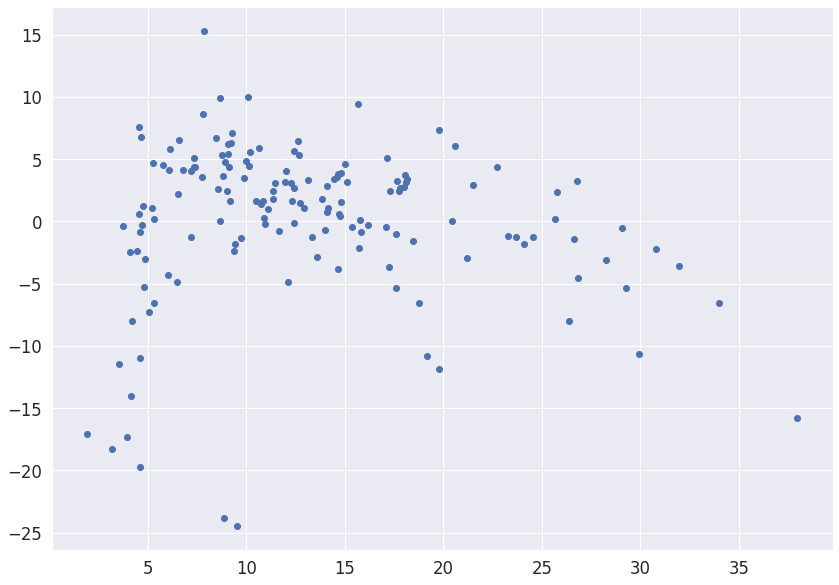

In [103]:
delta1 = slr1.predict(X_test1)- y_test1 # отклонение прогноза от разметки
plt.scatter(X_test1, delta1)

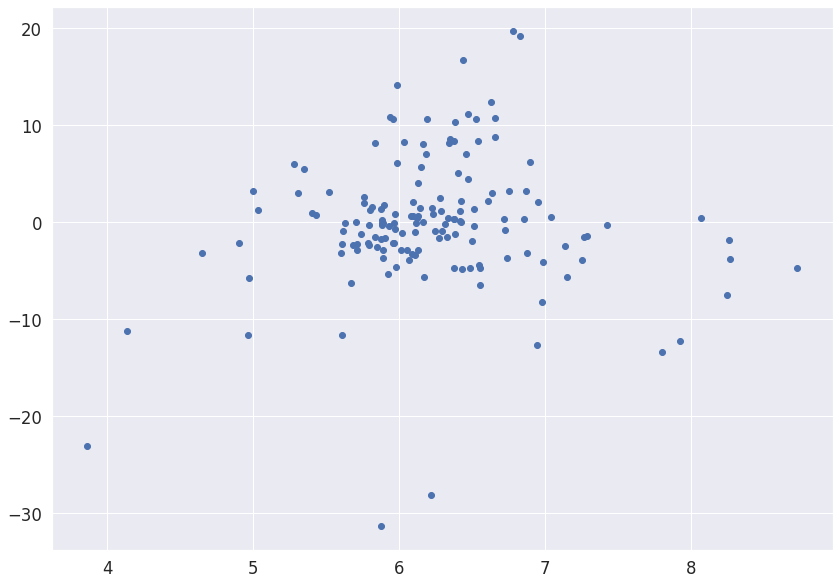

In [104]:
delta2 = slr2.predict(X_test2)- y_test2 # отклонение прогноза от разметки
plt.scatter(X_test2, delta2)

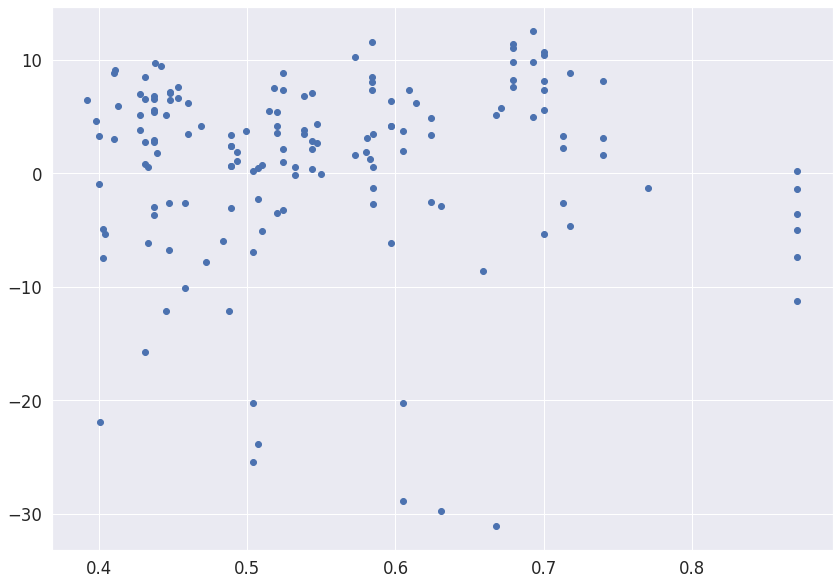

In [105]:
delta3 = slr3.predict(X_test3)- y_test3 # отклонение прогноза от разметки
plt.scatter(X_test3, delta3)

# Вывод

### Очевидно, что качество прогнозной модели улучшается с ростом количества факторов прогнозируемой модели.

# Регуляризация в линейной модели

Функция стоймости
$$
J(w) = 
\sum\limits_i \left( y^{(i)} - \hat{y}^{(i)} \right)^2
$$

LASSO (Least Absolute Shrinkage and Selection Operator)
$$
J(\mathbf{w}) = 
\sum\limits_i \left( y^{(i)} - \hat{y}^{(i)} \right)^2
+
\alpha \|\mathbf{w}\|_1
$$

Ridge Regression
$$
J(\mathbf{w}) = 
\sum\limits_i \left( y^{(i)} - \hat{y}^{(i)} \right)^2
+
\alpha \|\mathbf{w}\|_2^2
$$

Elastic Net
$$
J(\mathbf{w}) = 
\sum\limits_i \left( y^{(i)} - \hat{y}^{(i)} \right)^2
+
\alpha \|\mathbf{w}\|_1
+
\alpha \|\mathbf{w}\|_2^2
$$

In [157]:
from sklearn.linear_model import Lasso

In [158]:
las1 = Lasso(alpha = 0.01).fit(X_train, y_train)
las2 = Lasso(alpha = 100).fit(X_train, y_train) 

In [159]:
las1.coef_ # весовые коэфициенты

array([-1.19781267e-01,  4.50927968e-02, -1.20756474e-03,  2.37139386e+00,
       -1.27895493e+01,  3.86361448e+00, -1.30345553e-02, -1.45015497e+00,
        2.32505393e-01, -1.13659281e-02, -9.81006635e-01,  7.02981602e-03,
       -4.91365559e-01])

In [160]:
las2.coef_ # весовые коэфициенты

array([-0.       ,  0.       , -0.       ,  0.       , -0.       ,
        0.       , -0.       ,  0.       , -0.       , -0.0218883,
       -0.       ,  0.0032827, -0.       ])

In [164]:
weights = []
alphas = []

for a in 10**np.arange(-5,5,0.1):
    ls = Lasso(alpha = a).fit(X_train, y_train)
    weights.append(ls.coef_)
    alphas.append(a)
weights = np.array(weights).T # теперь каждая строка это коэф регуляризации для одного признака

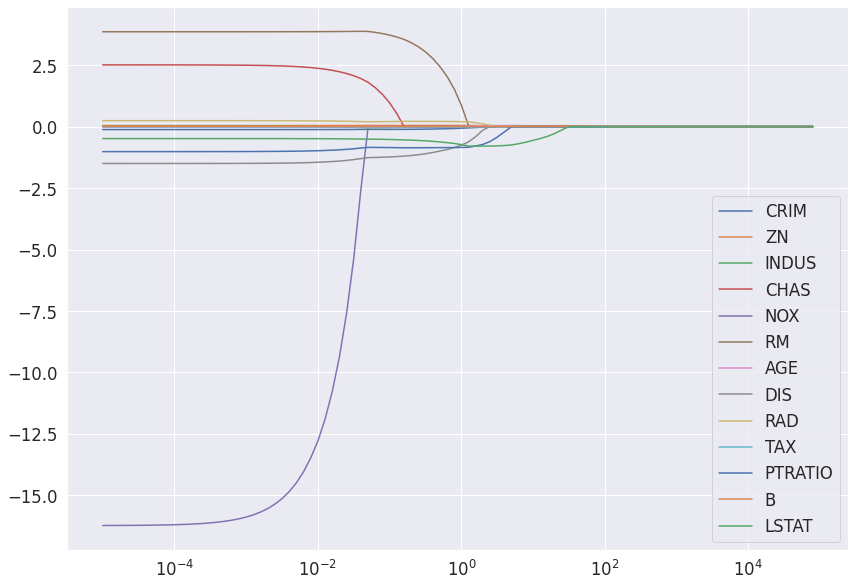

In [166]:
for w, c in zip(weights, dt.columns):
    plt.plot(alphas, w, label=c)
plt.xscale('log')
plt.legend(loc='lower right')

##### Наиболее важные признаки отделяются первыми по ходу ослабления регуляризации (на графике справа налево)

# Полиноминальная регрессия

In [176]:
X1 = dt['LSTAT'].values.reshape(-1,1)
y1 = dt['MEDV'].values

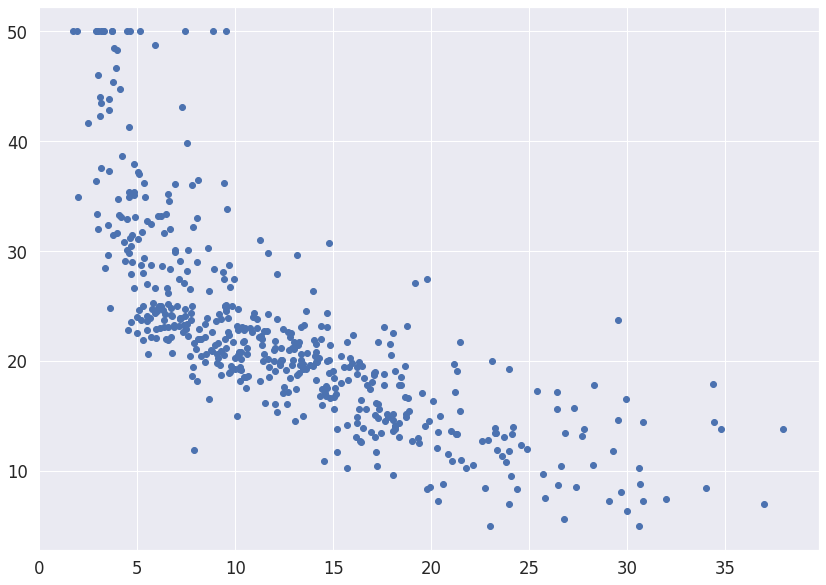

In [177]:
plt.scatter(X1[:,0], y1, marker='o')

In [187]:
from sklearn.preprocessing import PolynomialFeatures

In [188]:
quad = PolynomialFeatures(degree = 2)
cubic = PolynomialFeatures(degree = 3)
quatro = PolynomialFeatures(degree = 4)

In [189]:
X1_1 = X1
X1_2 = quad.fit_transform(X1)
X1_3 = cubic.fit_transform(X1)
X1_4 = quatro.fit_transform(X1)

In [191]:
lr_1 = LinearRegression().fit(X1_1, y1)
lr_2 = LinearRegression().fit(X1_2, y1)
lr_3 = LinearRegression().fit(X1_3, y1)
lr_4 = LinearRegression().fit(X1_4, y1)

In [199]:
X_s = np.linspace(X1.min(), X1.max(), 1000).reshape(-1,1)

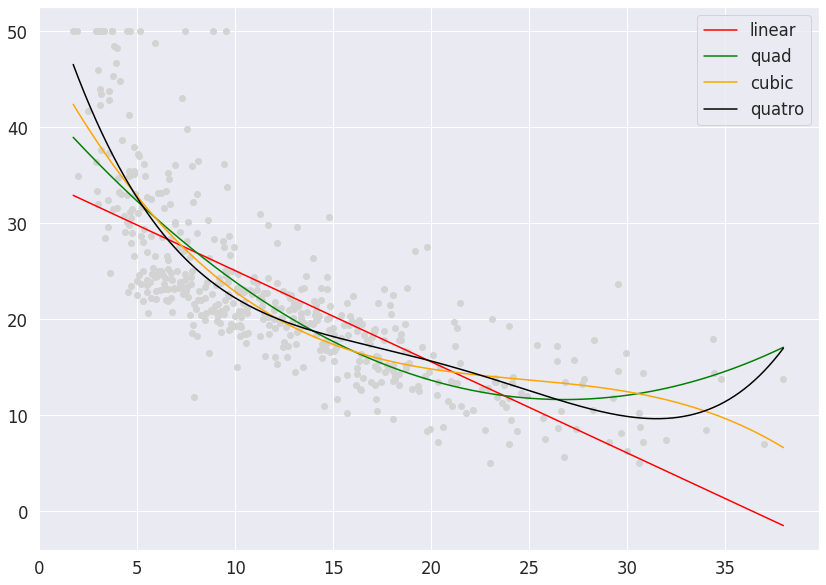

In [204]:
plt.scatter(X1, y1, marker='o', color='lightgray')
plt.plot(X_s, lr_1.predict(X_s), color='red', label='linear')
plt.plot(X_s, lr_2.predict(quad.fit_transform(X_s)), color='green', label='quad')
plt.plot(X_s, lr_3.predict(cubic.fit_transform(X_s)), color='orange', label='cubic')
plt.plot(X_s, lr_4.predict(quatro.fit_transform(X_s)), color='black', label='quatro')
plt.legend(loc='upper right')